### 0) kütüphanelerin yüklenmesi

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits # mnist veri seti sklearn'den yüklendi
from sklearn.model_selection import train_test_split , GridSearchCV # veri setinin eğitim ve test olarak bölünmesi
from sklearn.preprocessing import StandardScaler # veri setinin standartlaştırılması
from sklearn.decomposition import PCA # veri setinin PCA dönüşümü
from sklearn.svm import SVC # veri setinin sınıflandırılması

from sklearn.ensemble import RandomForestClassifier , VotingClassifier # veri setinin sınıflandırılması

from sklearn.neighbors import KNeighborsClassifier # veri setinin sınıflandırılması

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay # sınıflandırma sonuçlarının hesaplanması 

In [10]:
digits =load_digits() #matris şeklinde görüntü verisi içeriyor 
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [11]:
x , y = digits.data , digits.target #x e datayı y ye de bu dataya karşılık gelen etiketleri atadık

## 1) veri yükleme ve ön işleme

In [12]:
x_train , x_test , y_train ,  y_test=train_test_split( x , y , test_size=0.2  )


##### veriyi  standartize etme


In [13]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test) 
#burada sadece transform kullanıyoruz. çünkü fit_transform ile train ve test aynı şekilde ölçeklendirilir.

## 2) pca ile boyut indirgeme (dimension reduction)


In [14]:
pca =PCA(n_components=0.95)# n_components=0.95 varyansın %95'ini korumak için kullanılır.
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)
 #64 boyuttan  38 boyuta  düşürüyoruz. pca ile 


# 64 boyutlu veriyi 34 boyuta veri türüne düşürüyoruz bilgi kaybetmeden % 95 koruyarak . pca ile 

print("x_test_scaled shape:",x_test_scaled.shape)
print("x_test_pca shape:",x_test_pca.shape)




x_test_scaled shape: (360, 64)
x_test_pca shape: (360, 40)


mantığı anlamak için 2 boyutlu bir veri seti oluşturalım. ve görselleştirme işlemi yapalım.

In [15]:
pca_2d=PCA(n_components=2)
x_train_pca_2d=pca_2d.fit_transform(x_train_scaled)
x_test_pca_2d=pca_2d.transform(x_test_scaled)




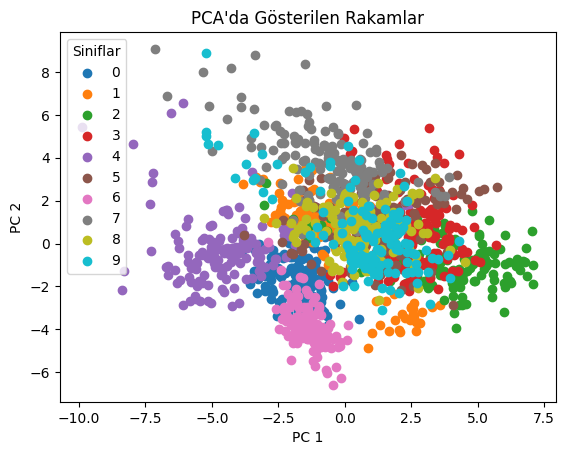

In [16]:
#64 boyutu 2 boyuta kadar indirgedik 

plt.figure() #toplamda 10 sınıf var her sınıfı farklı renk ile gösterelim
for i in np.unique(y_train):
    plt.scatter(x_train_pca_2d[y_train==i ,0] , x_train_pca_2d[y_train==i ,1]
                ,label=digits.target_names[i])
    


plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA'da Gösterilen Rakamlar")
plt.legend(title="Siniflar",loc="best")
plt.show()




In [17]:
#burada üst üste gelen sayılar aynı zamanda birbiri ile karıştırılabilecek rakamları da ifade ediyor
#  örnek olarak 7 ve 4 ( gri, mor)birbirine fazla karıştırılmıyor iken
# 8 ve 9 biribiri üzerinde yani fazlaca karıştırılabilir (sarı , açık mavi)

## 3) model traning and grid search

In [18]:
# 3 tane makine öğrenmesi algoritması kullanarak rakam analizi yapacağız. votingclassifier ile başarıyı artırmaya çalışacağız 

####  SVM

In [19]:
svm_params={'C':[0.1,1,10],'kernel':['rbf',"lineear"]} #'gamma':[1,0.1,0.01,0.001,0.0001],

svm=SVC()
svm_grid=GridSearchCV(svm,svm_params,cv=5)
svm_grid.fit(x_train_pca,y_train) #pca da 2d olanı kullanmadık  0.95 lik olanı kullandık


c:\Users\canoz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\canoz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\canoz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\canoz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ['rbf', 'lineear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


#### Random Forest

In [20]:
rf_params={ "n_estimators": [50,100, 200]} #sadece bu değeri verdik bu nodel için  "params" parameters
rf=RandomForestClassifier(random_state=42)
rf_grid=GridSearchCV(rf,rf_params,cv=5)
rf_grid.fit(x_train_pca,y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


#### KNN

In [21]:
knn_params={"n_neighbors":[3,5,7]}

knn=KNeighborsClassifier()
knn_grid=GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(x_train_pca,y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


#### svm random forest ve knn için en iyi parametrelerin belirlenmesi

In [22]:
best_svm=svm_grid.best_estimator_
best_rf=rf_grid.best_estimator_
best_knn=knn_grid.best_estimator_


## 4) votig classifier

In [23]:
voting_clf=VotingClassifier( estimators=[
("svm",best_svm),
("rf",best_rf),
("knn",best_knn)]  , voting="hard" ) # burda hard ve soft olabilir hard: çoğunluğa göre kara verir soft: olasılık toplama yada ortalama oylama dır 
                    # bizim modelller olasıllık üretmediği için hard kullanıyoruz


                    

In [24]:
 #todo  VotingClassifier de ,voting de hard ve soft  farkı nedir ?

In [25]:
voting_clf.fit(x_train_pca,y_train)
y_pred = voting_clf.predict(x_test_pca)

## 5) sonuçların değerlendirilmesi 

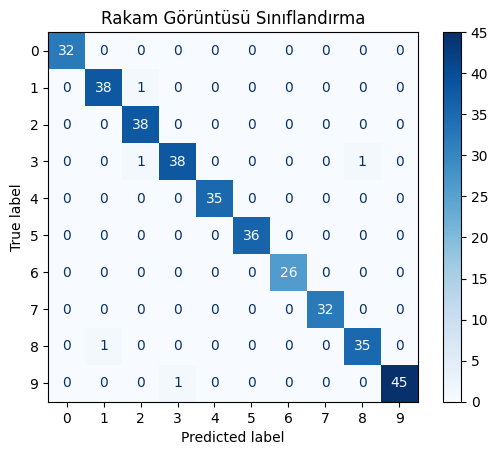

In [26]:
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=digits.target_names)

display.plot(cmap=plt.cm.Blues)
plt.title("Rakam Görüntüsü Sınıflandırma")
plt.show()

örnek olarak 3 olan değeri 2 olarak tahmin etmişiz
8 olan değeri 1 olarak tahmin etmişiz vs..
başarı oranı oldukça yüksek yani 98%+


In [27]:
print(f"best scm params: {svm_grid.best_params_}")
print(f"best rf params: {rf_grid.best_params_}")
print(f"best knn params: {knn_grid.best_params_}")
print(f"voting classifier occuracy: {voting_clf.score(x_test_pca,y_test)}")


best scm params: {'C': 1, 'kernel': 'rbf'}
best rf params: {'n_estimators': 200}
best knn params: {'n_neighbors': 3}
voting classifier occuracy: 0.9861111111111112
